In [93]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [94]:
import pathlib

data_dir = pathlib.Path("DATA") # indiquer chemin  où sont les données

In [95]:
image_count = len(list(data_dir.glob('*/*.jpg'))) # compte le nb d'images dans le dossier
image_count

20

In [96]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]) 
CLASS_NAMES # liste des noms de dossiers

array(['De', 'Pour,vers'], dtype='<U9')

In [97]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30)

In [98]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # 
BATCH_SIZE = 248
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [99]:
train_data_gen = train_datagen.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
#On importe les images

Found 248 images belonging to 2 classes.


In [100]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images

In [101]:
def show_batch_greyscale(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(np.squeeze(image_batch[n]),cmap = "gray")
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
#Fonction d'affichage des images grissées

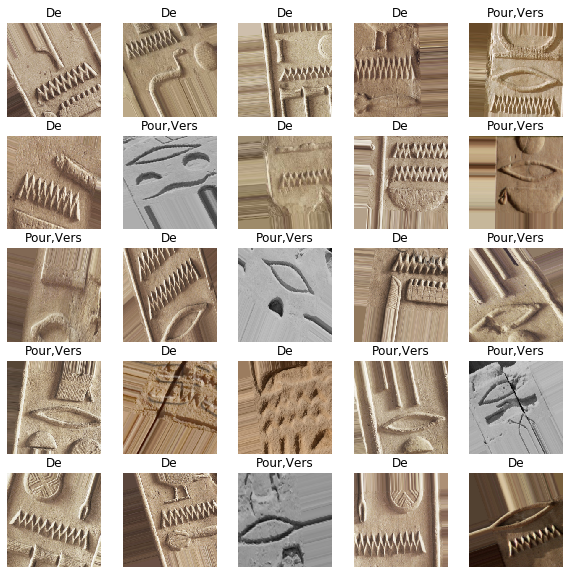

In [102]:
image_batch, label_batch = next(train_data_gen) #Pour séparer le label de l'image
show_batch(image_batch, label_batch)
#show_batch_greyscale(image_batch, label_batch)

In [103]:
image_batch.shape

(248, 224, 224, 3)

In [104]:
def augm(datagen):
    datagen.fit(image_batch)
    augmT = []
    for el in datagen.flow(image_batch,shuffle=False):
        for i in range(0, len(el)):
            if i == 0 : augmT.append(el[i])
            else : augmT.append(el[i])

        break
    augmT =  np.array(augmT)
    return augmT
        

In [105]:

#datagen = ImageDataGenerator(rotation_range=30)
#datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
#datagen = ImageDataGenerator(brightness_range=[0.9,1.01])
#datagen = ImageDataGenerator(fill_mode='constant')
#datagen = ImageDataGenerator(cval=255)
datagen = ImageDataGenerator(width_shift_range=[-50,50])

new_img =  np.concatenate((image_batch,augm(datagen)))
new_label =  np.concatenate((label_batch,label_batch))
new_img.shape

(280, 224, 224, 3)

In [106]:
from sklearn.model_selection import train_test_split

(trainX, testX, trainY, testY) = train_test_split(image_batch, label_batch, test_size=0.25)

In [107]:
#sauvegarde weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="weights/checkpoint_tfl.h5",
                                                 save_weights_only=True,
                                                 verbose=1)

In [108]:
HEIGHT = 224
WIDTH = 224

#base_model = ResNet50(weights='imagenet', 
#                      include_top=False, 
#                      input_shape=(HEIGHT, WIDTH, 3))


In [109]:
from keras.models import Sequential, Model
from keras import applications
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers

In [110]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
"""for layer in model.layers:
    layer.trainable = False"""

'for layer in model.layers:\n    layer.trainable = False'

In [111]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)
model_final = Model(input = model.input, output = predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])
history = model_final.fit(trainX, trainY, epochs=10, 
                    validation_data=(testX, testY))
#,callbacks=[cp_callback]

C:\Users\theoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


Train on 186 samples, validate on 62 samples
Epoch 1/10
186/186 [==============================] - 133s 715ms/step - loss: 0.8689 - accuracy: 0.4839 - val_loss: 0.7247 - val_accuracy: 0.6452
Epoch 2/10
186/186 [==============================] - 131s 705ms/step - loss: 0.7485 - accuracy: 0.6237 - val_loss: 0.7893 - val_accuracy: 0.6452
Epoch 3/10
186/186 [==============================] - 134s 720ms/step - loss: 0.6378 - accuracy: 0.6452 - val_loss: 0.5820 - val_accuracy: 0.6774
Epoch 4/10
186/186 [==============================] - 131s 704ms/step - loss: 0.6363 - accuracy: 0.6290 - val_loss: 0.5508 - val_accuracy: 0.7903
Epoch 5/10
186/186 [==============================] - 139s 748ms/step - loss: 0.5766 - accuracy: 0.7312 - val_loss: 0.5540 - val_accuracy: 0.6452
Epoch 6/10
186/186 [==============================] - 141s 757ms/step - loss: 0.5152 - accuracy: 0.7366 - val_loss: 0.4813 - val_accuracy: 0.7581
Epoch 7/10
186/186 [==============================] - 135s 725ms/step - loss: 0

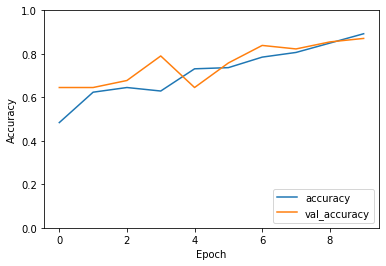

In [112]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_final.evaluate(testX,  testY, verbose=2)

In [113]:
print(test_acc)

0.8709677457809448
